In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy import signal

In [2]:
# Define a signal
signal = np.array([1, 2, 3, 4, 5, 6, 7, 8])

# Choose the Symlet wavelet and the level of decomposition
wavelet = 'sym5'
level = 2

In [3]:
# Perform wavelet decomposition
coeffs = pywt.wavedec(signal, wavelet, level=level)

/home/carlitos/Documents/Projects/ecg_classification/venv/lib/python3.10/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 2 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [4]:
# Reconstruct the signal from the wavelet coefficients
reconstructed_signal = pywt.waverec(coeffs, wavelet)

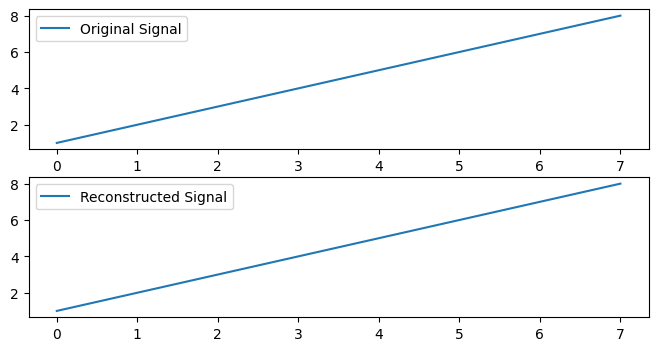

In [6]:
# Original Signals
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(signal, label='Original Signal')
plt.legend()

# deconstructed signals
plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal, label='Reconstructed Signal')
plt.legend()

plt.show()

In [8]:
# Create a noisy signal
np.random.seed(42)
t = np.linspace(0, 1, 1000, endpoint=False)
signal_true = np.sin(2 * np.pi * 7 * t)
noise = 0.2 * np.random.normal(size=len(t))
noisy_signal = signal_true + noise

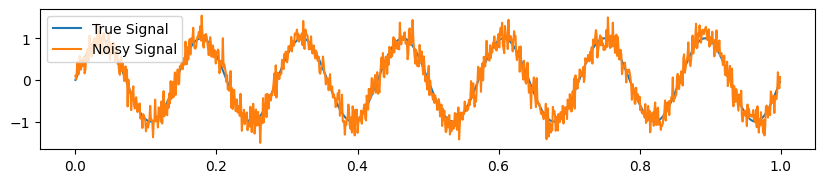

In [17]:
# Plot the original and noisy signals
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(t, signal_true, label='True Signal')
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.legend()

plt.show()

In [11]:
# Perform wavelet thresholding for denoising
wavelet = 'sym4'
level = 4

In [13]:
# Decompose the signal
coeffs = pywt.wavedec(noisy_signal, wavelet, level=level)

In [18]:
# Set a threshold value
# threshold = 0.2
# A universal threshold based on the noise standard deviation
threshold = np.sqrt(2 * np.log(len(noisy_signal))) * np.std(coeffs[-1])

# Threshold the wavelet coefficients
coeffs_thresholded = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

# Reconstruct the denoised signal
denoised_signal = pywt.waverec(coeffs_thresholded, wavelet)

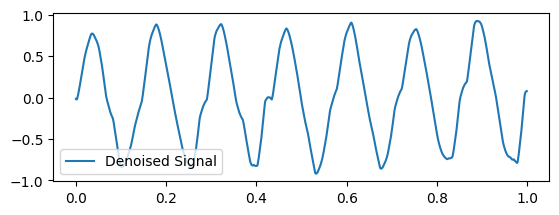

In [19]:
plt.subplot(2, 1, 2)
plt.plot(t, denoised_signal, label='Denoised Signal')
plt.legend()

plt.show()

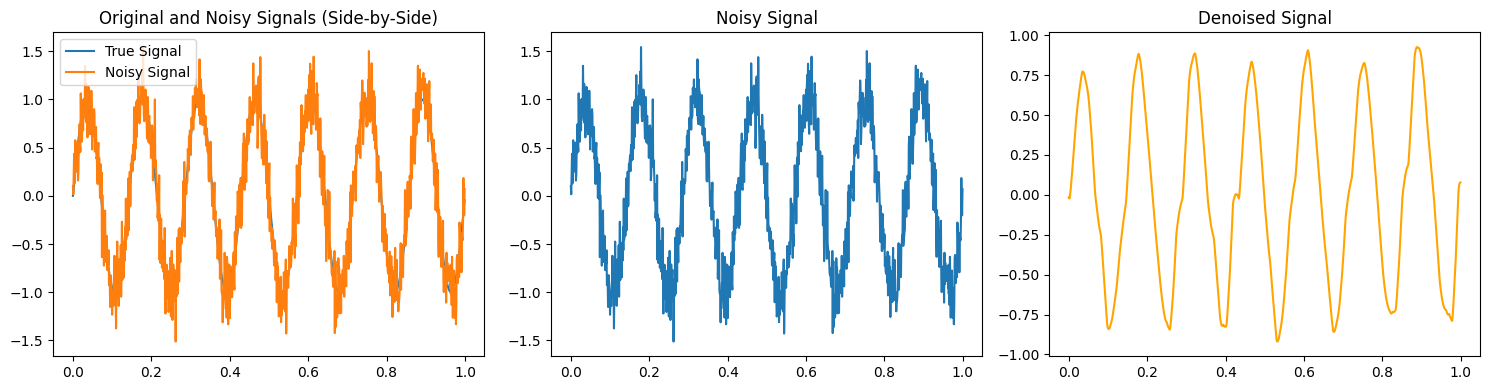

In [22]:
# Side-by-side
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(t, signal_true, label='True Signal')
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.title('Original and Noisy Signals (Side-by-Side)')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.title('Noisy Signal')

plt.subplot(1, 3, 3)
plt.plot(t, denoised_signal, label='Denoised Signal', color='orange')
plt.title('Denoised Signal')

plt.tight_layout()
plt.show()